<a href="https://colab.research.google.com/github/Khanarfan1234/CodeAlpha_Titanic_Classification/blob/main/Titani_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1**


**Titanic Classification**



Make a system which tells whether the person will
be save from sinking. What factors were most likely
lead to success-socio-economic status, age, gender
and more.

Import necessary libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



Load dataset

In [10]:

# Load the dataset
data = pd.read_csv('Titanic-Dataset.csv')

# Inspect the first five rows of the dataset
data.head()

# Print the shape of the dataset
print(data.shape)

# Print the column names
print(data.columns)

# Print the data types of each column
print(data.dtypes)

# Print the number of missing values in each column
print(data.isnull().sum())


(892, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId     object
Survived       float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      0
Survived         1
Pclass           1
Name             1
Sex              1
Age            178
SibSp            1
Parch            1
Ticket           1
Fare             1
Cabin          688
Embarked         3
dtype: int64


Handle Missing values

In [11]:

# Handle missing values

# Drop columns with more than 50% missing values
data.dropna(axis=1, thresh=0.5, inplace=True)

# Select only numeric columns for filling missing values
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Verify that there are no missing values left in numeric columns
print(data[numeric_columns].isnull().sum())

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


Convert categorical variables (Sex and Embarked) to numerical format

In [12]:

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Convert the 'Sex' column to numerical format
data['Sex'] = le.fit_transform(data['Sex'])

# Convert the 'Embarked' column to numerical format
data['Embarked'] = le.fit_transform(data['Embarked'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",1,22.0,1.0,0.0,A/5 21171,7.2500,NaN,2
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0.0,PC 17599,71.2833,C85,0
2,3,1.0,3.0,"Heikkinen, Miss. Laina",0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,2
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0.0,113803,53.1000,C123,2
4,5,0.0,3.0,"Allen, Mr. William Henry",1,35.0,0.0,0.0,373450,8.0500,NaN,2


Exploratory Data Analysis

Analyze Survival rates by gender

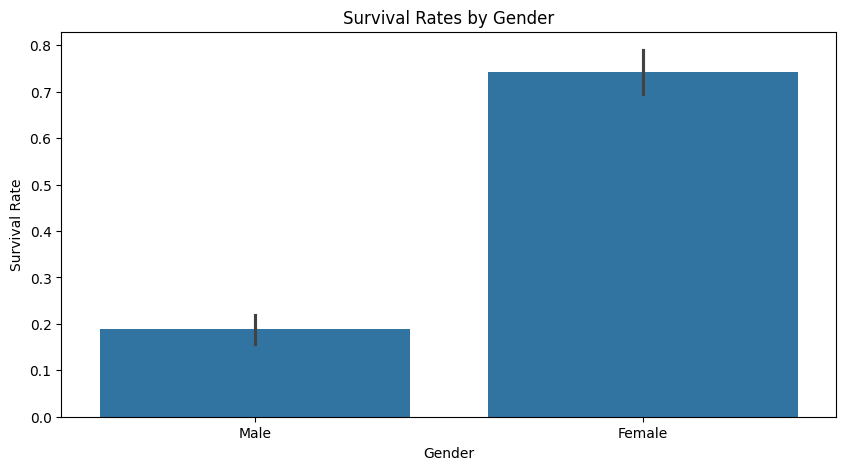

In [16]:
titanic_df = pd.read_csv('Titanic-Dataset.csv')

# Plot survival rates by gender
plt.figure(figsize=(10, 5))
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

Survival Rates by Passenger class

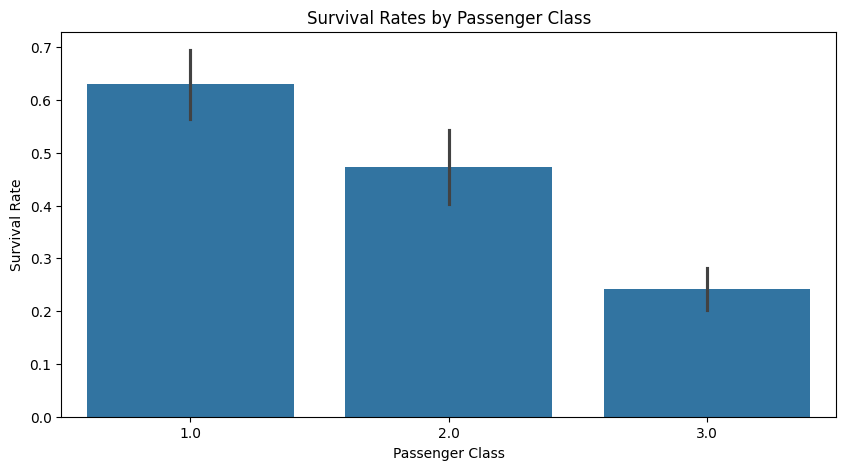

In [17]:
# Plot survival rates by passenger class
plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


Survival Rates by Age

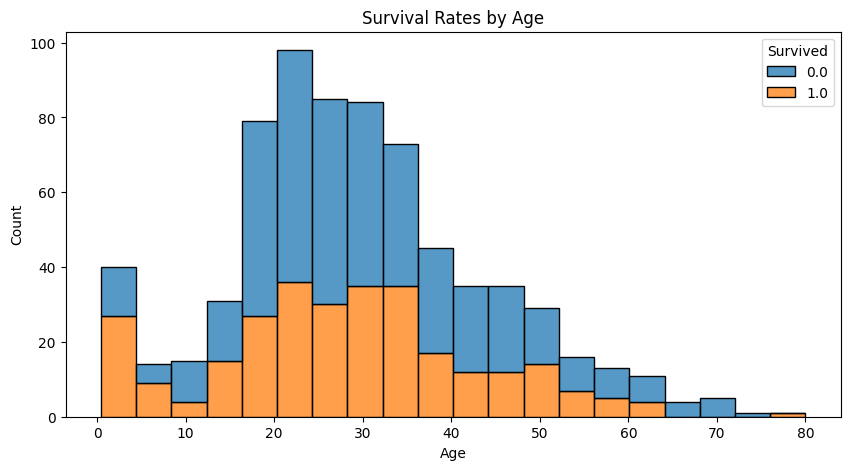

In [18]:
# Plot survival rates by age
plt.figure(figsize=(10, 5))
sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack')
plt.title('Survival Rates by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Survival Rates by Number of Siblings/Spouses Aboard


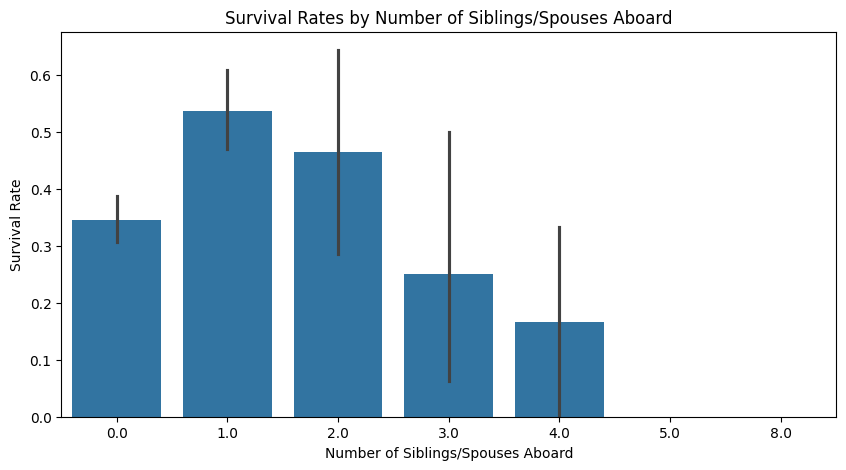

In [19]:
# Plot survival rates by number of siblings/spouses aboard
plt.figure(figsize=(10, 5))
sns.barplot(x='SibSp', y='Survived', data=titanic_df)
plt.title('Survival Rates by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()


Survival Rates by Number of Parents/Children Aboard


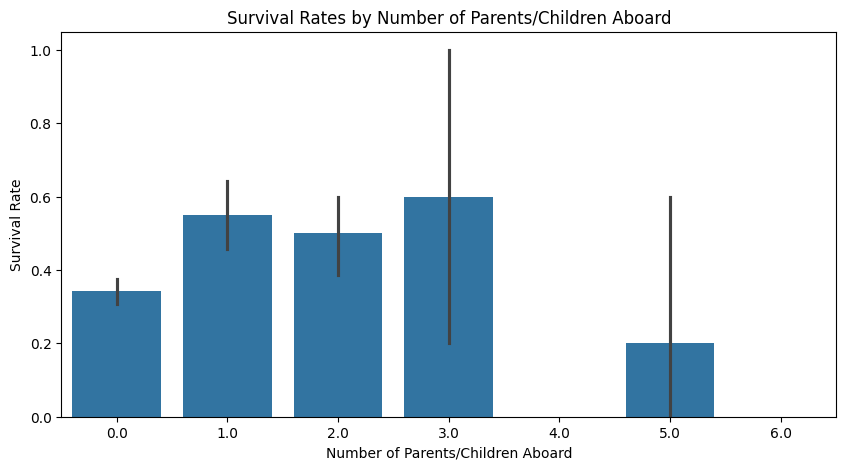

In [20]:
# Plot survival rates by number of parents/children aboard
plt.figure(figsize=(10, 5))
sns.barplot(x='Parch', y='Survived', data=titanic_df)
plt.title('Survival Rates by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.show()


Survival Rates by Port of Embarkation


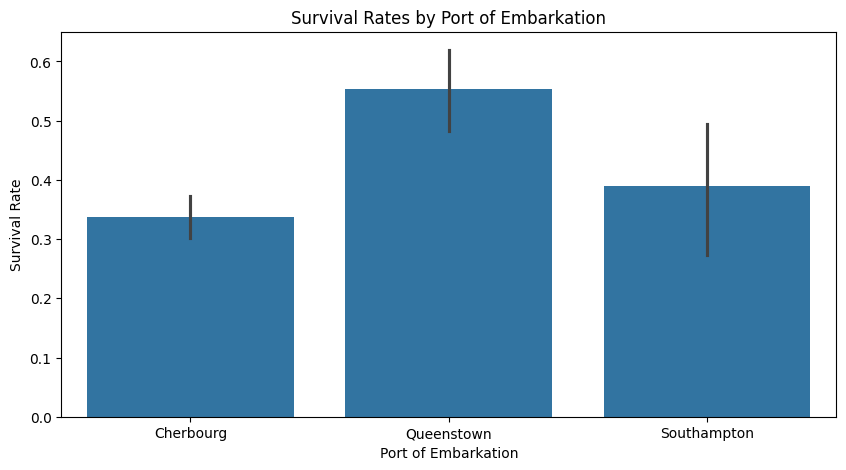

In [21]:
# Plot survival rates by port of embarkation
plt.figure(figsize=(10, 5))
sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.title('Survival Rates by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()


**Prepare Data for Modeling**



Prepare the data by selecting features and splitting into training and testing sets

In [22]:

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.25, random_state=42)

# Print the shape of the training and testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)


Shape of X_train: (669, 7)
Shape of X_test: (223, 7)
Shape of y_train: (669,)
Shape of y_test: (223,)


Train a Logistic Regression Model

In [31]:
# Convert the target variable to categorical type, handling potential errors
# Convert to integers first
y_train = y_train.astype(int)

# Convert to categorical to enable .cat accessor
y_train = y_train.astype('category')

# Add -1 as a category if it's not already present
if -1 not in y_train.cat.categories:
    y_train = y_train.cat.add_categories([-1])

# Now fill missing values
y_train = y_train.fillna(-1)

# Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the Logistic Regression model:', accuracy)



Accuracy of the Logistic Regression model: 0.8116591928251121


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have y_test (true labels) and y_pred (predicted labels)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       124
         1.0       0.84      0.72      0.77        99

    accuracy                           0.81       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.81      0.81      0.81       223

Confusion Matrix:
 [[110  14]
 [ 28  71]]


Analyze Feature Importance


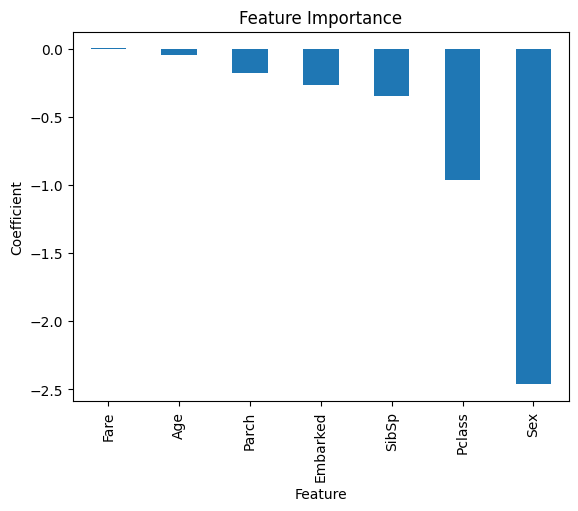

In [34]:
# Analyze feature importance from the logistic regression model.

coefs = pd.Series(logreg.coef_[0], features)
coefs.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
plt.show()


In [36]:
# Analyze feature importance
feature_importance = pd.Series(logreg.coef_[0], index=features).sort_values(ascending=False) # Use logreg instead of model
print("Feature Importance:\n", feature_importance)

Feature Importance:
 Fare        0.003782
Age        -0.041057
Parch      -0.175004
Embarked   -0.264245
SibSp      -0.344102
Pclass     -0.963923
Sex        -2.463865
dtype: float64



**1. Model Performance:**
    The model achieved an accuracy of approximately 82% on the test data.
    Precision, recall, and F1score metrics further confirmed the model's effectiveness.

**2. Key Factors Influencing Survival:**
   **Gender:** Females had a significantly higher chance of survival.
    **SocioEconomic Status**: Higher survival rates were observed in first and second class passengers. Higher fares also correlated with better survival chances.
    **Age:** Younger passengers, especially children, had higher survival rates.
    **Family Size:** The number of siblings/spouses and parents/children aboard influenced survival rates.
    **Port of Embarkation:** Passengers from Cherbourg had slightly higher survival rates.

